<p><a href="https://colab.research.google.com/github/Fklag/SNT/blob/master/Copie_modif_de_intro_to_pandas.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a></p> <p><a href="https://mybinder.org/v2/gh/Fklag/SNT/master" target="_blank"><img src="https://mybinder.org/badge_logo.svg" alt="Open In Binder"/></a></p>

#### Copyright 2017 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

 # Présentation rapide de Pandas

**Objectifs d'apprentissage :**
  * Introduction aux structures de données `DataFrame` et `Series` de la bibliothèque *Pandas*
  * Accéder aux données et les manipuler dans une structure `DataFrame` et `Series`
  * Importer des données d'un fichier CSV dans un `DataFrame` *Pandas*
  * Réindexer un `DataFrame` pour mélanger les données

 [*Pandas*](http://pandas.pydata.org/) est une API d'analyse de données orientée colonnes. C'est un excellent outil pour manipuler et analyser des données d'entrée. Beaucoup de frameworks d'apprentissage automatique acceptent les structures de données *Pandas* en entrée.
Il faudrait des pages et des pages pour présenter de manière exhaustive l'API *Pandas*, mais les concepts fondamentaux sont relativement simples. Aussi, nous avons décidé de vous les exposer ci-dessous. Pour une description plus complète, vous pouvez consulter le [site de documentation de *Pandas*](http://pandas.pydata.org/pandas-docs/stable/index.html), sur lequel vous trouverez de multiples informations ainsi que de nombreux didacticiels.

 ## Concepts de base

La ligne de code suivante permet d'importer l'API *pandas* et d'afficher sa version :

In [0]:
from __future__ import print_function

import pandas as pd
pd.__version__

u'0.24.2'

 On distingue deux grandes catégories de structures de données *Pandas* :

  * Le **`DataFrame`**, un tableau relationnel de données, avec des lignes et des colonnes étiquetées
  * La **`Series`**, constituée d'une seule colonne. Un `DataFrame` contient une ou plusieurs `Series`, chacune étant étiquetée.

Le DataFrame est une abstraction fréquemment utilisée pour manipuler des données. [Spark](https://spark.apache.org/) et [R](https://www.r-project.org/about.html) proposent des implémentations similaires.

 Pour créer une `Series`, vous pouvez notamment créer un objet `Series`. Par exemple :

In [0]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

 Il est possible de créer des objets `DataFrame` en transmettant un `dictionnaire` qui met en correspondance les noms de colonnes (des `chaînes de caractères`) avec leur `Series` respective. Lorsque la longueur de la `Series` ne correspond pas, les valeurs manquantes sont remplacées par des valeurs [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) spéciales. Exemple :

In [0]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


 Le plus souvent, vous chargez un fichier entier dans un `DataFrame`. Dans l'exemple qui suit, le fichier chargé contient des données immobilières pour la Californie. Exécutez la cellule suivante pour charger les données et définir les caractéristiques :

In [0]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


 Dans l'exemple ci-dessus, la méthode `DataFrame.describe` permet d'afficher des statistiques intéressantes concernant un `DataFrame`. La fonction `DataFrame.head` est également utile pour afficher les premiers enregistrements d'un `DataFrame` :

Visualisation de données avec $\texttt{Pandas}$ et $\texttt{matplotlib}$

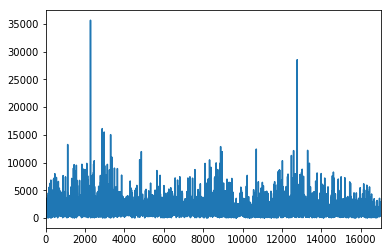

In [0]:
import matplotlib.pyplot as plt
california_housing_dataframe.population.plot()
plt.show()

In [0]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


 Autre fonction puissante de *Pandas* : la représentation graphique. Avec `DataFrame.hist`, par exemple, vous pouvez vérifier rapidement la façon dont les valeurs d'une colonne sont distribuées :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65f97548d0>]],
      dtype=object)

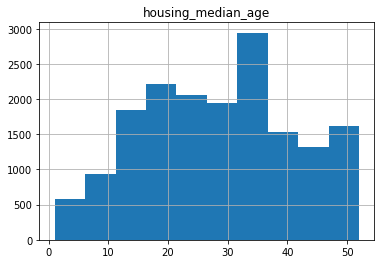

In [0]:
california_housing_dataframe.hist('housing_median_age')

 ## Accéder aux données

L'accès aux données d'un `DataFrame` s'effectue au moyen d'opérations de liste ou de dictionnaire Python courantes :

In [0]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [0]:
print(type(cities['City name'][1]))
cities['City name'][1]

<type 'str'>


'San Jose'

In [0]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


 *Pandas* propose en outre une API extrêmement riche, avec des fonctions avancées d'[indexation et de sélection](http://pandas.pydata.org/pandas-docs/stable/indexing.html), que nous ne pouvons malheureusement pas aborder ici dans le détail.

 ## Manipuler des données

Il est possible d'effectuer des opérations arithmétiques de base de Python sur les `Series`. Par exemple :

In [0]:
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

 [NumPy](http://www.numpy.org/) est un kit d'outils de calculs scientifiques populaire. Les `Series` *Pandas* peuvent faire office d'arguments pour la plupart des fonctions NumPy :

In [0]:
import numpy as np

np.log(population)

 La méthode `Series.apply` convient pour les transformations à une colonne plus complexes. Comme la [fonction `map`](https://docs.python.org/2/library/functions.html#map) de Python, elle accepte en argument une [fonction `lambda`](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), appliquée à chaque valeur.

L'exemple ci-dessous permet de créer une `Series` signalant si la `population` dépasse ou non un million d'habitants :

In [0]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

 
La modification des `DataFrames` est également très simple. Ainsi, le code suivant permet d'ajouter deux `Series` à un `DataFrame` existant :

In [0]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


 ## Exercice n° 1

Modifiez le tableau `cities` en ajoutant une colonne booléenne qui prend la valeur True si et seulement si les *deux* conditions suivantes sont remplies :

  * La ville porte le nom d'un saint.
  * La ville s'étend sur plus de 50 miles carrés.

**Remarque** : Pour combiner des `Series` booléennes, utilisez des opérateurs de bits, pas les opérateurs booléens classiques. Par exemple, pour le *ET logique*, utilisez `&` au lieu de `and`.

**Astuce** : En espagnol, "San" signifie "saint".

In [0]:
# Your code here

 ### Solution

Cliquez ci-dessous pour afficher la solution.

In [0]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

 ## Index
Les objets `Series` et `DataFrame` définissent également une propriété `index`, qui affecte un identifiant à chaque élément d'une `Series` ou chaque ligne d'un `DataFrame`. 

Par défaut, *Pandas* affecte les valeurs d'index en suivant l'ordre des données source. Ces valeurs ne varient pas par la suite ; elles restent inchangées en cas de réagencement des données.

In [0]:
city_names.index

In [0]:
cities.index

 Appelez `DataFrame.reindex` pour réorganiser manuellement les lignes. Le code suivant, par exemple, revient à trier les données par nom de ville :

In [0]:
cities.reindex([2, 0, 1])

 La réindexation est un excellent moyen de mélanger (organiser aléatoirement) les données d'un `DataFrame`. Dans l'exemple ci-dessous, l'index de type tableau est transmis à la fonction NumPy `random.permutation`, qui mélange les valeurs. En appelant `reindex` avec ce tableau mélangé, nous mélangeons également les lignes du `DataFrame`.
Exécutez plusieurs fois la cellule suivante !

In [0]:
cities.reindex(np.random.permutation(cities.index))

 Pour en savoir plus, consultez la [documentation relative aux index](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

 ## Exercice n° 2

La méthode `reindex` autorise les valeurs d'index autres que celles associées au `DataFrame` d'origine. Voyez ce qu'il se passe lorsque vous utilisez ce type de valeurs ! Pourquoi est-ce autorisé à votre avis ?

In [0]:
# Your code here

 ### Solution

Cliquez ci-dessous pour afficher la solution.

 Lorsque le tableau d'entrée `reindex` contient des valeurs d'index ne faisant pas partie de la liste des index du `DataFrame` d'origine, `reindex` ajoute des lignes pour ces index \'manquants\' et insère la valeur `NaN` dans les colonnes correspondantes :

In [0]:
cities.reindex([0, 4, 5, 2])

 Ce comportement est souhaitable, car les index sont souvent des chaînes de caractères extraites des données réelles. La [documentation *Pandas* sur la fonction `reindex`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) inclut un exemple avec des noms de navigateurs comme valeurs d'index).

Dans ce cas, autoriser les index \'manquants\' facilite la réindexation à l'aide d'une liste externe, car vous n'avez pas à vous préoccuper de l'intégrité des données d'entrée.